# Deep Learning Model - Keras
## Guide

In [ ]:
guide = "https://www.kaggle.com/code/harshlakhani/eda-xgboost-class-predicition/notebook"

## Make necessary imports

In [39]:
#Import Libraries
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import numpy as np

## Importing data
### Import data

In [3]:
od.download("https://www.kaggle.com/datasets/kukuroo3/body-performance-dataset")   # Got error, so I downloaded it manually

Skipping, found downloaded files in ".\body-performance-dataset" (use force=True to force download)


### Read data

In [4]:
file = 'body-performance-dataset/bodyPerformance.csv'
df = pd.read_csv(file)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


### Preprocessing

In [5]:
df.shape

(13393, 12)

In [6]:
#check for missing values
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [7]:
#Rename columns
df = df.rename(columns={"body fat_%":"body_fat", "height_cm":"height", "weight_kg":"weight", "sit and bend forward_cm":"bend_forward", "gripForce":"grip_force","sit-ups counts":"sit_ups", "broad jump_cm":"broad_jump"})

In [8]:
df.sample(5)

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
1100,22.0,F,152.6,47.60,20.9,63.0,111.0,23.2,28.6,46.0,168.0,A
7167,25.0,M,187.1,86.50,8.9,82.0,137.0,53.9,17.0,67.0,247.0,A
6747,34.0,M,165.1,62.30,16.2,97.0,148.0,38.1,15.4,53.0,230.0,B
4589,21.0,F,167.5,50.98,24.8,75.0,132.0,24.8,20.2,40.0,168.0,B
11071,23.0,F,161.9,50.60,22.0,78.0,116.0,36.5,25.5,47.0,172.0,A


## Exploratory Data Analysis (EDA)

### Gender and Weight
Insight 1: Males tend to be taller and heavier than females.

<AxesSubplot: xlabel='gender', ylabel='weight'>

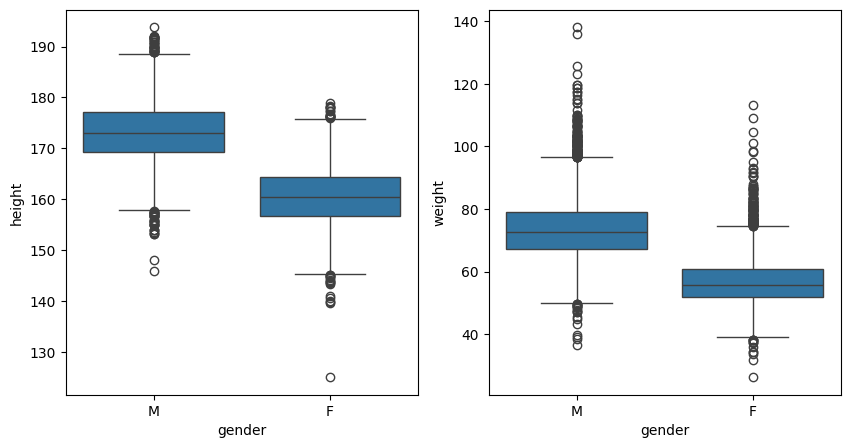

In [9]:
#Gender and height / weight
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.boxplot(x="gender", y="height", data=df, ax=ax)
ax = plt.subplot(1,2,2)
sns.boxplot(x="gender", y="weight", data=df, ax=ax)

### Gender and Body fat
Insight 2: Females, on average, have a slightly higher body fat % than males.

<AxesSubplot: xlabel='gender', ylabel='body_fat'>

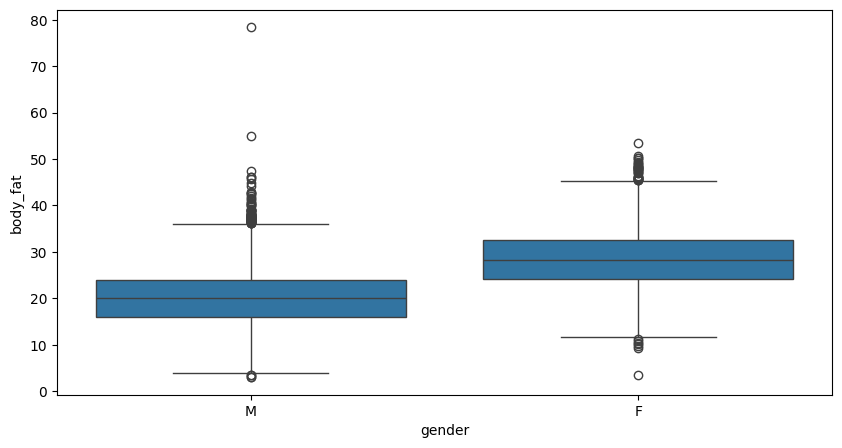

In [10]:
#Gender and body fat
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
sns.boxplot(x="gender", y="body_fat", data=df, ax=ax)

### Gender and Gripforce
Insight 3: Males tend to have a higher grip force on average compared to females.

<AxesSubplot: xlabel='gender', ylabel='grip_force'>

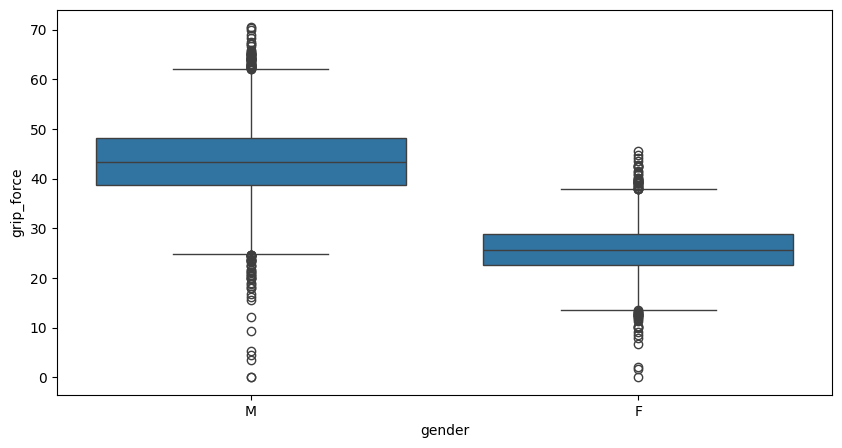

In [17]:
#Gender and gripforce
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
sns.boxplot(x="gender", y="grip_force", data=df, ax=ax)

In [18]:
df.groupby("gender").mean()

C:\Users\henri\AppData\Local\Temp\ipykernel_38068\2781464171.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("gender").mean()


,age,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump
gender,,,,,,,,,,
F,37.850995,160.485404,56.905899,28.486085,75.578197,123.986399,25.817994,18.839791,30.888348,153.326025
M,36.149167,173.257399,73.580187,20.188151,80.669411,133.870072,43.448420,13.097073,44.939176,211.541526


### Age and Body fat
Insight 4: There seems to be no correlation between age and body fat %

<AxesSubplot: xlabel='age', ylabel='body_fat'>

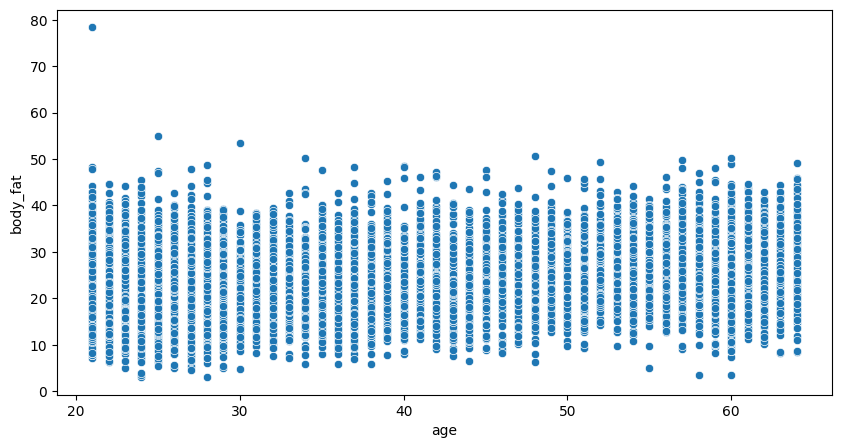

In [19]:
#Age and body fat
plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
sns.scatterplot(x="age", y="body_fat", data=df, ax=ax)

### Diastolic and Body fat, Age or Gender
Insight 5: There seems to be no correlation between diastolic blood pressure and body fat % as well as no correlation between diastolic blood pressure and age. However, males tend to have higher diastolic blood pressure compared to females.

[(25.0, 130.0)]

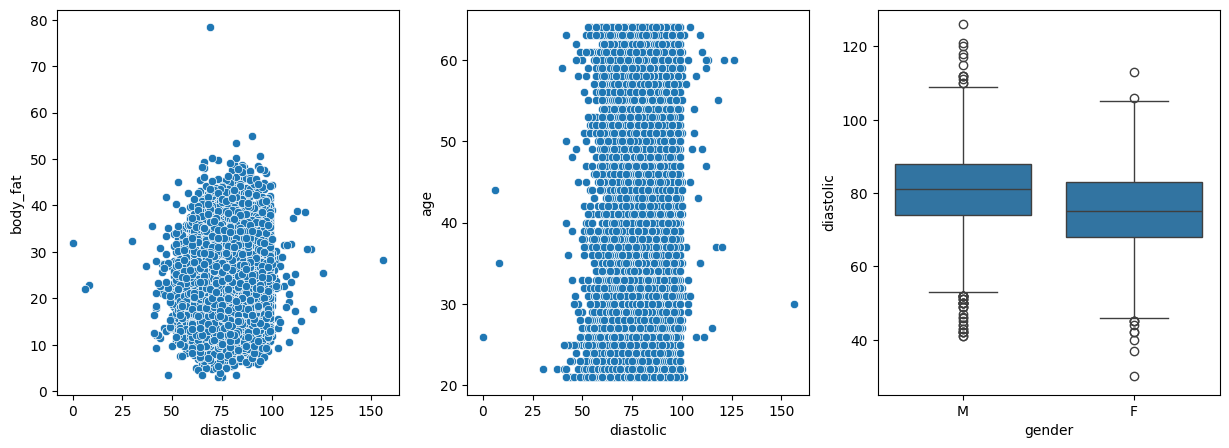

In [26]:
#Diastolic with bodyfat
#Diastolic with age
#Diastolic with gender
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
sns.scatterplot(x="diastolic", y="body_fat", data=df, ax=ax)
ax = plt.subplot(1,3,2)
sns.scatterplot(x="diastolic", y="age", data=df, ax=ax)
ax = plt.subplot(1,3,3)
sns.boxplot(x="gender", y="diastolic", data=df, ax=ax)
ax.set(ylim=(25,130))

### Systolic with Body fat, Age or Gender
Insight 6: There seems to be no correlation between systolic blood pressure and body fat % as well as no correlation between systolic blood pressure and age. However, males tend to have higher systolic blood pressure compared to females.

<AxesSubplot: xlabel='gender', ylabel='systolic'>

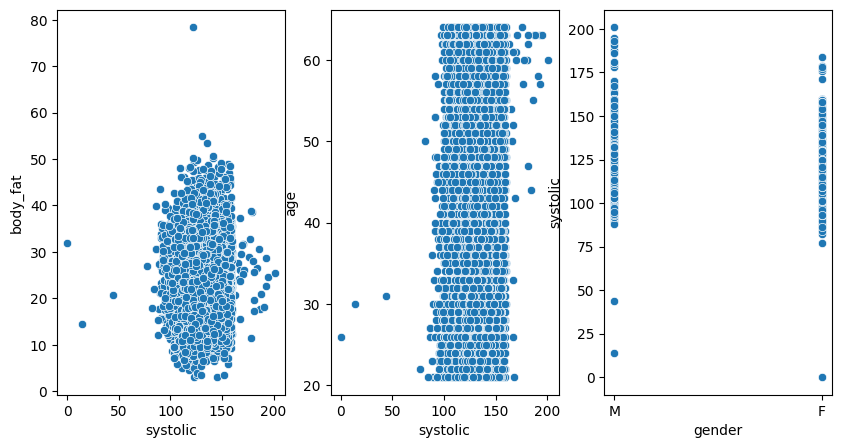

In [27]:
#Systolic with bodyfat
#Systolic with age
#Systolic with gender
plt.figure(figsize=(10,5))
ax = plt.subplot(1,3,1)
sns.scatterplot(x="systolic", y="body_fat", data=df, ax=ax)
ax = plt.subplot(1,3,2)
sns.scatterplot(x="systolic", y="age", data=df, ax=ax)
ax = plt.subplot(1,3,3)
sns.scatterplot(x="gender", y="systolic", data=df, ax=ax)

### Body fat and Gripforce or Bend forward
Insight 7: People with a lower body fat % have a higher grip force. There seems to be no correlation between body fat % and ability to bendforward.

<AxesSubplot: xlabel='body_fat', ylabel='bend_forward'>

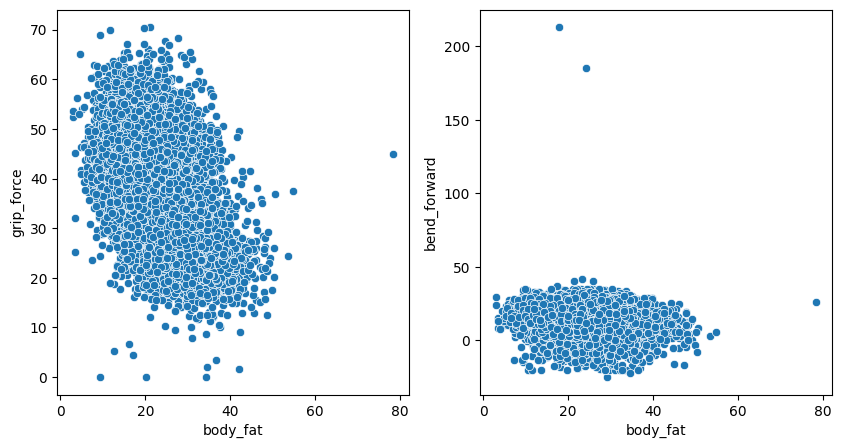

In [28]:
#Body fat and gripfore
#Body fat and bend forward
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.scatterplot(x="body_fat", y="grip_force", data=df, ax=ax)
ax = plt.subplot(1,2,2)
sns.scatterplot(x="body_fat", y="bend_forward", data=df, ax=ax)

### Body fat and Sit ups or Broadjump
Insight 8: People with a lower body fat % tend to be able to do a higher amount of sit ups. Moreover, people with a lower body fat % tend to be able to able to have a higher broad jump distance.

<AxesSubplot: xlabel='body_fat', ylabel='broad_jump'>

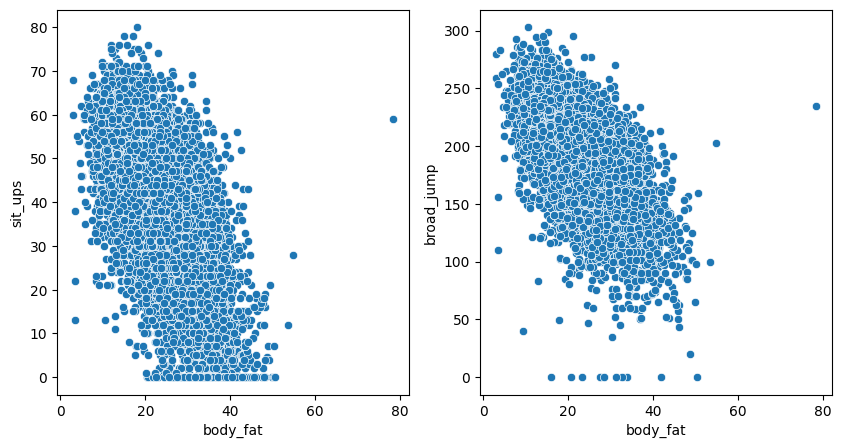

In [29]:
#Body fat and sit ups
#Body fat and broadjump
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.scatterplot(x="body_fat", y="sit_ups", data=df, ax=ax)
ax = plt.subplot(1,2,2)
sns.scatterplot(x="body_fat", y="broad_jump", data=df, ax=ax)

### Class and Gender or Age
Insight 9: It is difficult to state whether averagely more males fall under a certain class than females, because in the dataset, there are 8467 males compared to 4926 females. However, from the 2nd plot, we can infer that the average age for class A seems to be considerably lower than the other classes.

<AxesSubplot: xlabel='class', ylabel='age'>

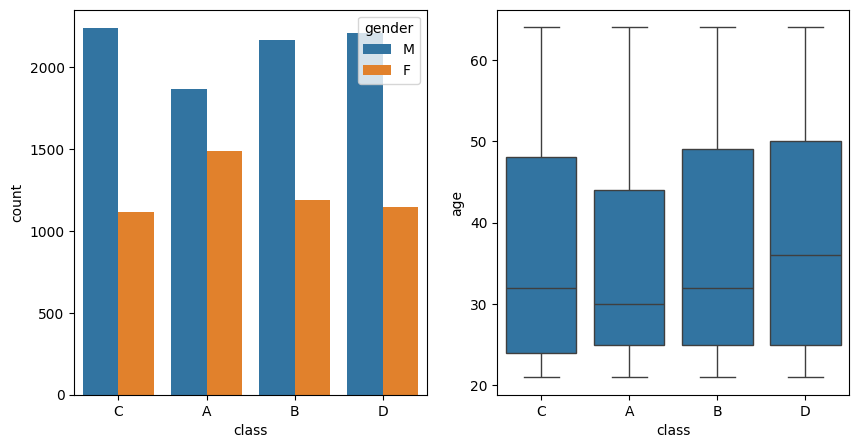

In [30]:
#Class and gender
#Class and age
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.countplot(x="class", hue="gender", data=df, ax=ax)
ax = plt.subplot(1,2,2)
sns.boxplot(x="class", y="age", data=df, ax=ax)

In [31]:
df.groupby("class")["age"].mean()

class
A    35.268220
B    37.074096
C    36.699612
D    38.058226
Name: age, dtype: float64

### Class and Body fat
Insight 10: On average, people in Class A tend to have a lower body fat %.

[(0.0, 60.0)]

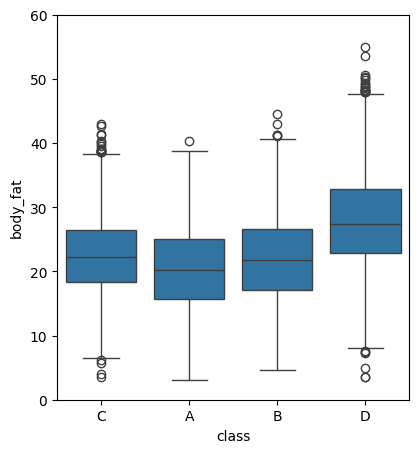

In [32]:
#Class and body fat
plt.figure(figsize=(10,5))
ax = plt.subplot(1,2,1)
sns.boxplot(x="class", y="body_fat", data=df, ax=ax)
ax.set(ylim=(0,60))

In [33]:
df.groupby("class")["body_fat"].mean()

class
A    20.539159
B    22.039981
C    22.644564
D    27.735432
Name: body_fat, dtype: float64

### Class and Sit ups, Bendforward and Broadjump
Insight 11: On average, people in Class A tend to be able to do more sit ups, bend more forward and able to jump further than the people in other classes.

<AxesSubplot: xlabel='class', ylabel='broad_jump'>

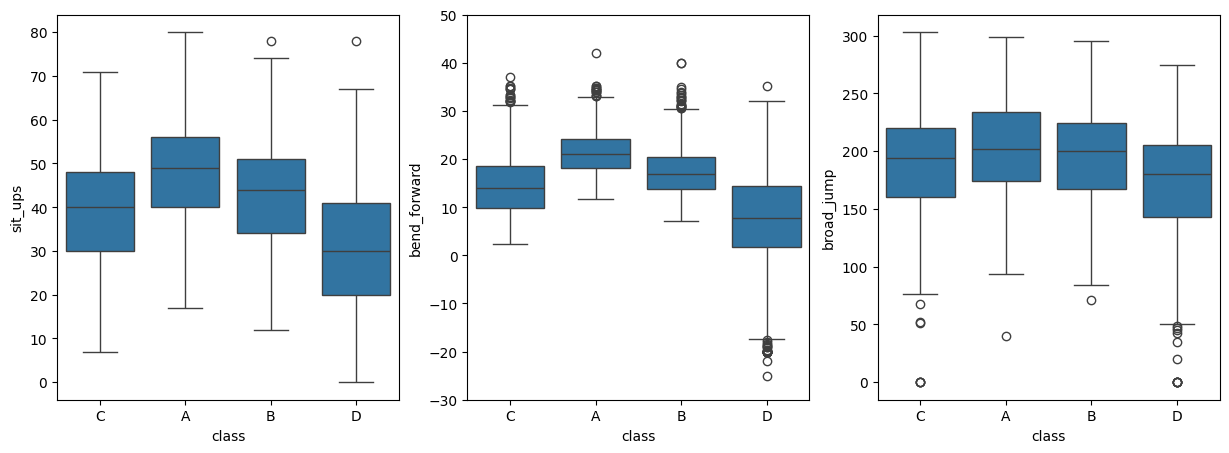

In [34]:
#Class and sit ups, bendforward, broad jump
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
sns.boxplot(x="class", y="sit_ups", data=df, ax=ax)
ax = plt.subplot(1,3,2)
sns.boxplot(x="class", y="bend_forward", data=df, ax=ax)
ax.set(ylim=(-30,50))
ax = plt.subplot(1,3,3)
sns.boxplot(x="class", y="broad_jump", data=df, ax=ax)

In [35]:
df.groupby("class")["sit_ups", "bend_forward", "broad_jump"].mean()

C:\Users\henri\AppData\Local\Temp\ipykernel_38068\1185934946.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("class")["sit_ups", "bend_forward", "broad_jump"].mean()


,sit_ups,bend_forward,broad_jump
class,,,
A,47.848268,21.391777,202.744026
B,42.639199,17.467586,195.332566
C,38.720215,14.390645,188.627949
D,29.881338,7.590260,173.820842


### Correlation between features

#### Heatmap

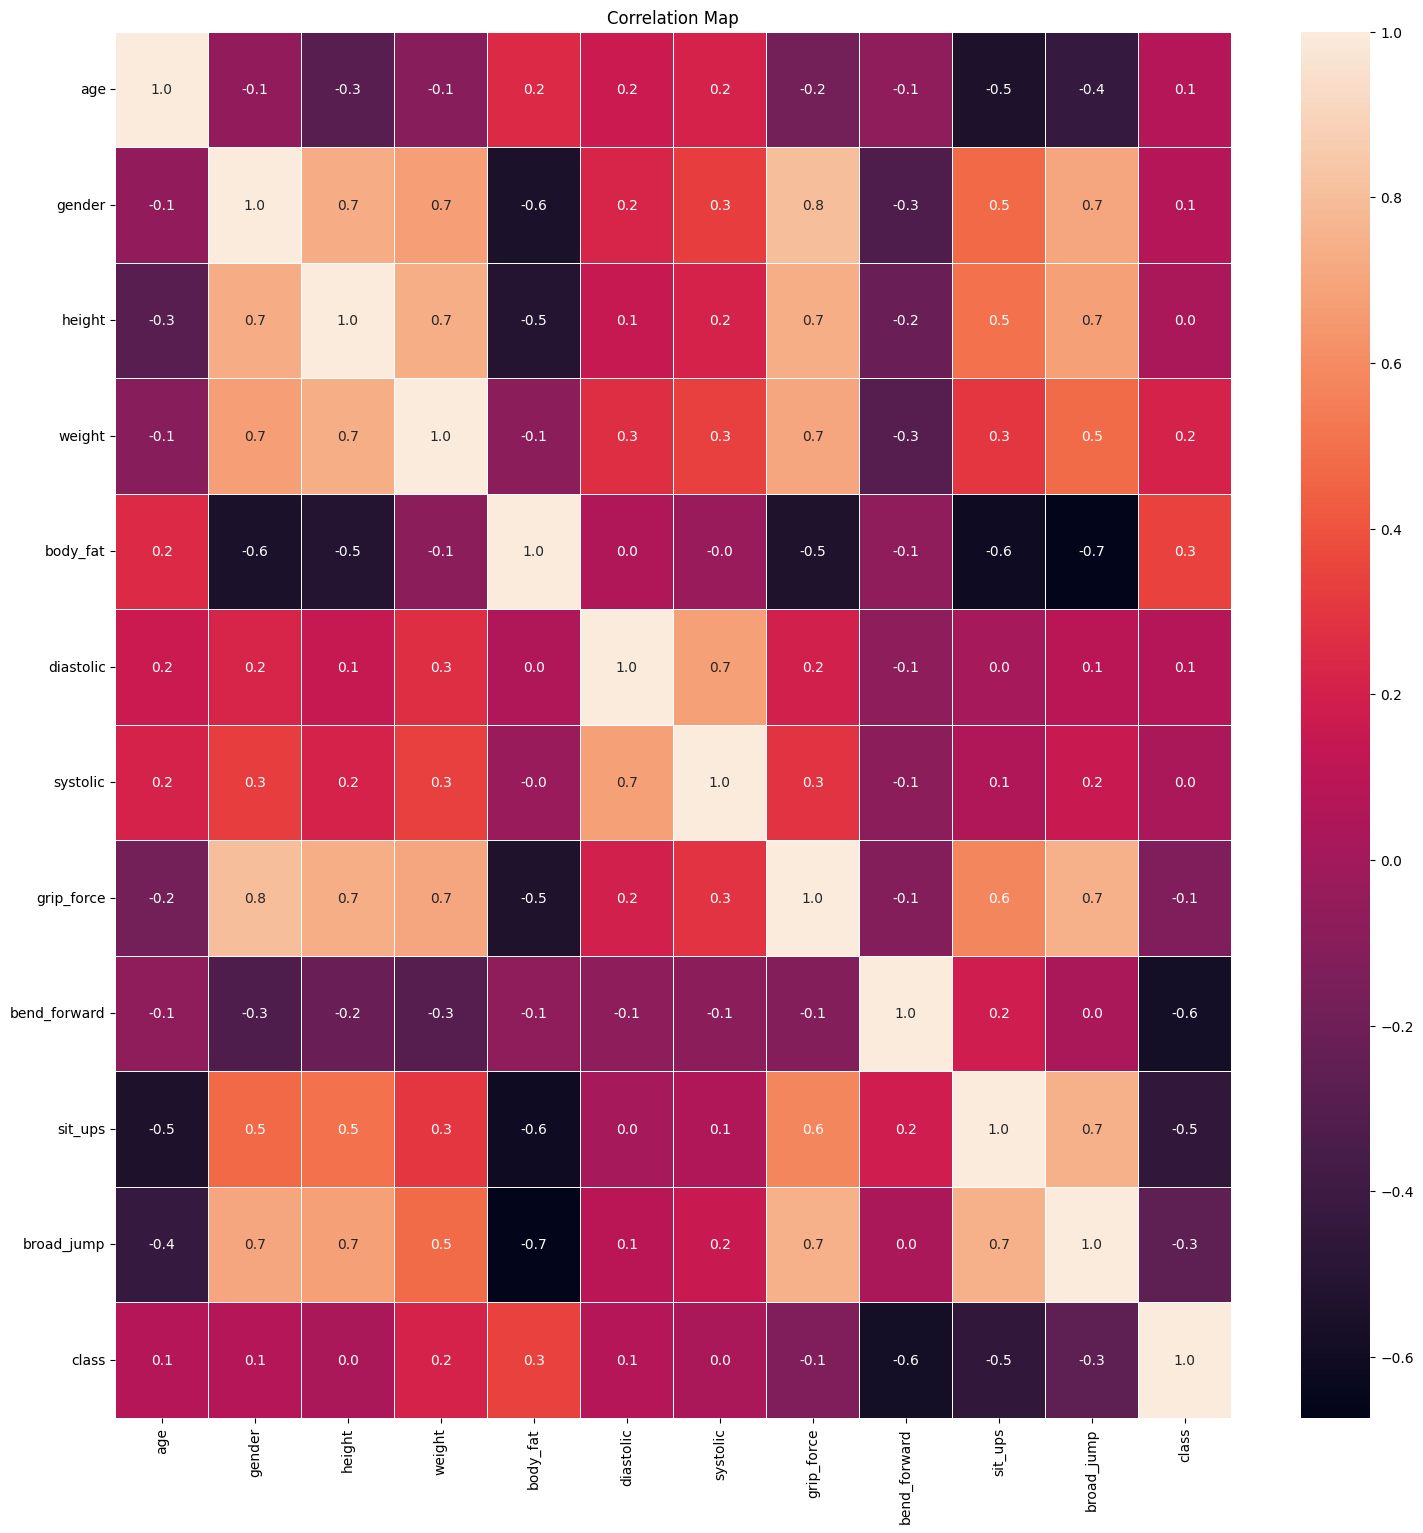

In [64]:
# look at the correlation between the numeric features
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.show()

#### Drop features with high correlation

In [66]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

#### Remake the heatmap

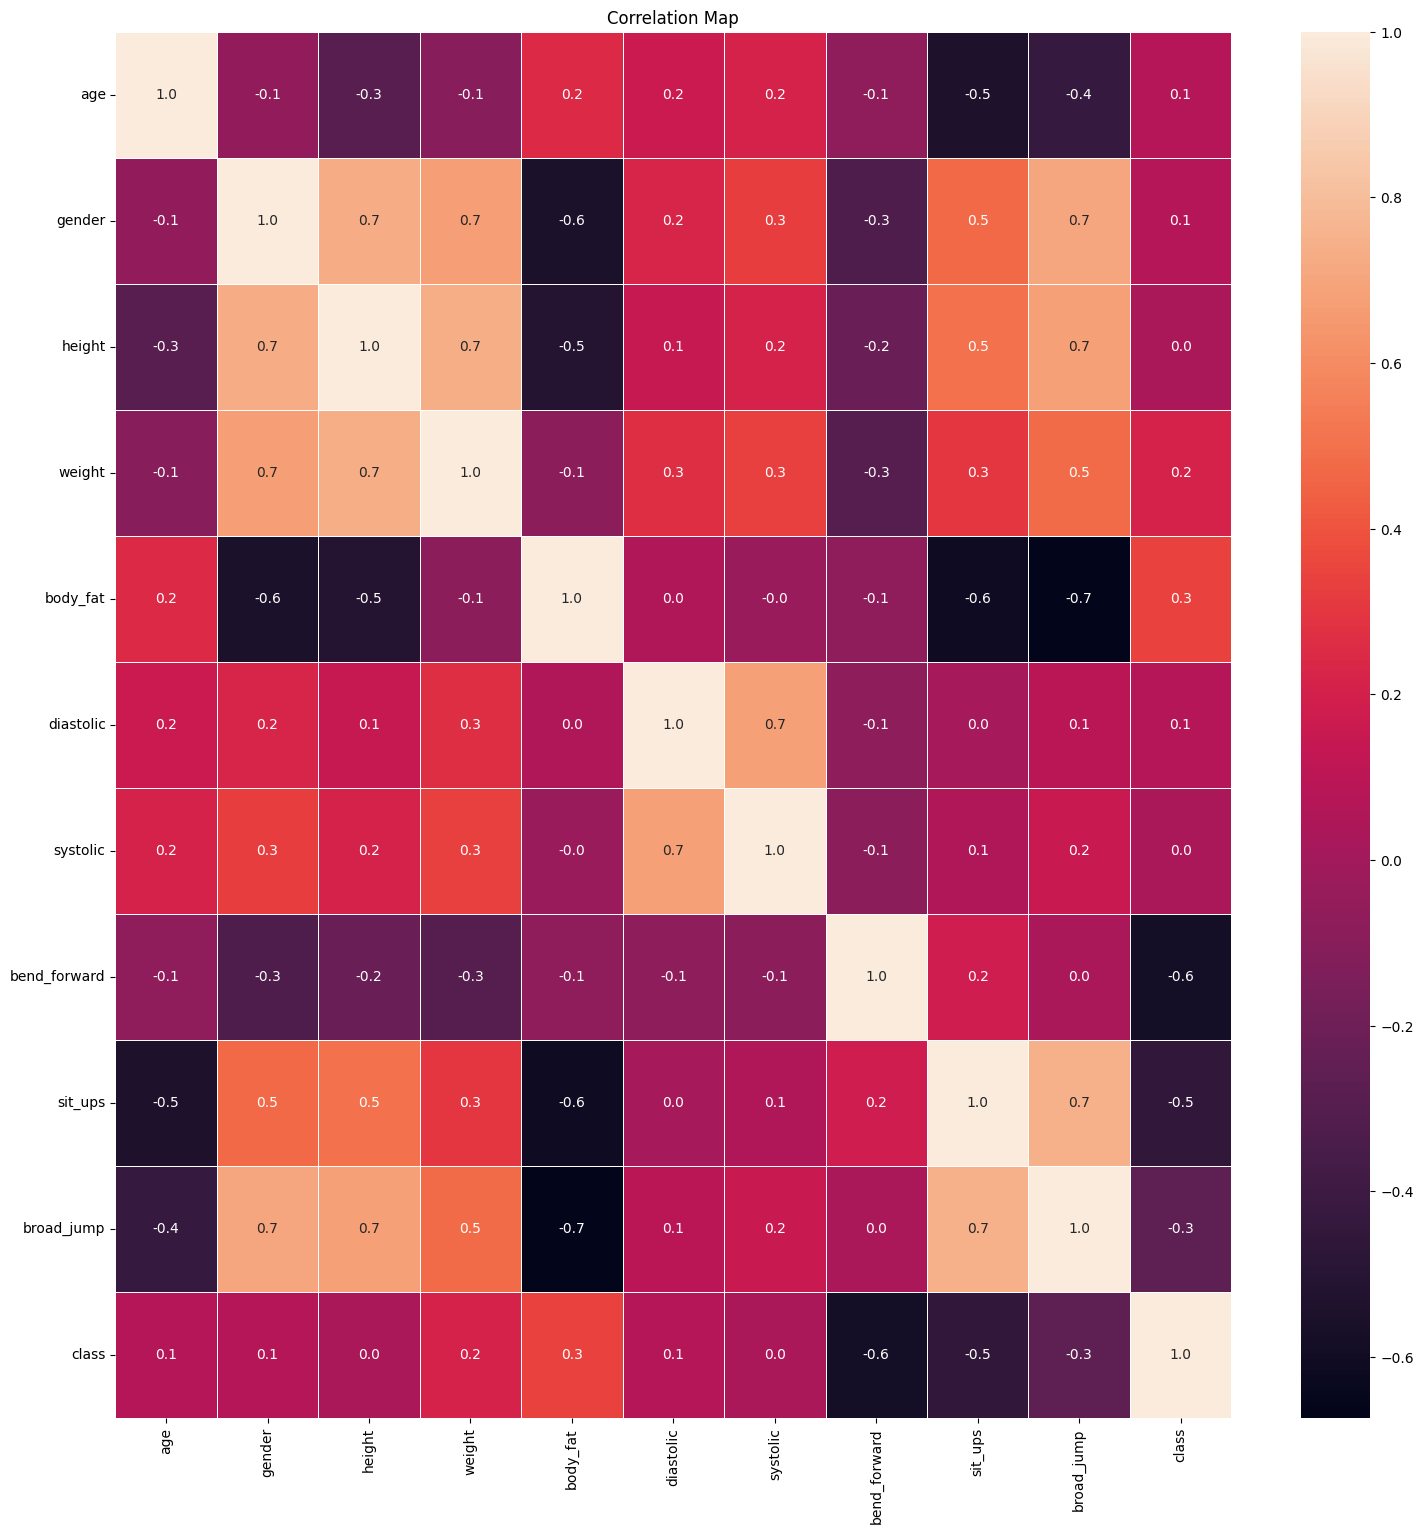

In [67]:
# look at the correlation between the numeric features
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Correlation Map")
plt.show()

## Modelling

In [37]:
tempdf=df

In [38]:
tempdf.sample()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
7980,62.0,M,181.4,80.2,28.2,80.0,153.0,31.6,1.0,18.0,127.0,D


### Preprocessing

In [40]:
#Changing gender and class column to numerical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(tempdf["gender"])
tempdf.drop("gender", axis=1)
tempdf["gender"] = label
label = le.fit_transform(tempdf["class"])
tempdf.drop("class", axis=1)
tempdf["class"] = label

In [41]:
tempdf.sample()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
2304,29.0,1,175.4,70.4,17.3,78.0,133.0,50.4,18.0,60.0,250.0,0


### Split Train/Test data

In [53]:
#split data into train and test data
train_x,test_x,train_y,test_y = train_test_split(tempdf.iloc[:,:-1],tempdf.iloc[:,-1],test_size = 0.2)

### Define and train the model

In [54]:
#XGBoost model
model = XGBRegressor(max_depth = 6)
model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Make predictions

In [60]:
#Set target object value            # Should probably be done differently
target = model.predict(test_x)
print(target)
target = target.round(0)
print(target)
target = np.array(target)
print(target)
target = target.astype(int)
print(target)

[ 3.0053935   2.8604417   0.138292   ... -0.15568063  0.26331288
  1.3546855 ]
[ 3.  3.  0. ... -0.  0.  1.]
[ 3.  3.  0. ... -0.  0.  1.]
[3 3 0 ... 0 0 1]


### Evaluation

In [61]:
#Calculate MSE
mean_squared_error(target, test_y)

0.40836132885405

In [57]:
target[:5]

array([3, 3, 0, 0, 2])

In [58]:
test_y[:5].values

array([3, 1, 1, 0, 2])

In [62]:
#Calculate accuracy of model
accuracy = accuracy_score(test_y, target)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 67.67%
